In [29]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# rectangle function from -0.5 to 0.5
def rect(x):
    return np.where(abs(x) <= 0.5, 1, 0)
# kronecker delta function
def delta(x):
    return np.where(x == 0, 1, 0)
# triangle function from -0.5 to 0.5
def tri(x):
    y = np.zeros(len(x))
    l = np.logical_and(x >= -0.5, x <= 0)
    r = np.logical_and(x > 0, x <= 0.5)
    y[l] = 1 + 2*x[l]
    y[r] = 1 - 2*x[r]
    return y

def gauss(x):
    return np.exp(-np.pi*x**2)

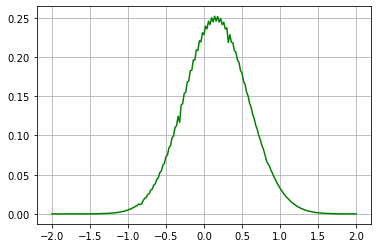

In [30]:
# Correlation without offset
# set this to True if you want to see convolution instead of cross-correlation
convolution = False
x = np.linspace(-2, 2, 201)
i = 0
corr_func = np.zeros(len(x))
for x0 in x:
    plt.grid(True, which='both')
    # function f
    y1 = rect(x)
    x2 = -x + x0 if convolution else x + x0
    # function g
    y2 = tri(x2)*rect(x2*2 - 0.5)
    corr = (y1*y2)
    # correlation or convolution of f and g
    corr_func[i] = integrate.simps(corr, x, even='avg')
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, corr_func)
    plt.show()
    plt.pause(0.01)
    i += 1
    clear_output(wait=True)
    plt.cla()
plt.grid(True, which='both')
plt.plot(x, corr_func, 'g')
plt.show()